In [61]:

import os
import shutil
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [36]:
# Step 1: Load Datasets
train_df = pd.read_csv('../dataset/train.csv')
features_df = pd.read_csv('../dataset/features.csv')
stores_df = pd.read_csv('../dataset/stores.csv')
test_df = pd.read_csv('../dataset/test.csv')
submission_df = pd.read_csv('../dataset/sampleSubmission.csv')

In [37]:
# Step 2: Merge Datasets
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [38]:
# Step 3: Fill Missing Values
dataset.fillna(method='ffill', inplace=True) # Forward Fill
dataset.fillna(method='bfill', inplace=True) # Backward Fill
dataset.fillna(0, inplace=True) # Fill remaining missing values with 0

/var/folders/w4/f376hn2540v32r_5rgtcw5zw0000gn/T/ipykernel_1050/3326647052.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True) # Forward Fill
/var/folders/w4/f376hn2540v32r_5rgtcw5zw0000gn/T/ipykernel_1050/3326647052.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill', inplace=True) # Backward Fill


In [39]:
dataset.shape

(421570, 16)

In [40]:
dataset.head()
test_dataset.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [41]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,5803.369639,1025.160742,607.296695,1602.829667,3019.281684,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,5930.458535,5262.315532,6336.582326,3926.216607,4177.965683,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,1843.450000,20.380000,3.200000,211.940000,1034.550000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,4864.300000,68.010000,23.950000,602.370000,1821.850000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,7756.750000,129.770000,104.500000,1664.040000,3721.710000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [42]:
dataset.shape

(421570, 16)

In [43]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [44]:
test_dataset.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [45]:
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

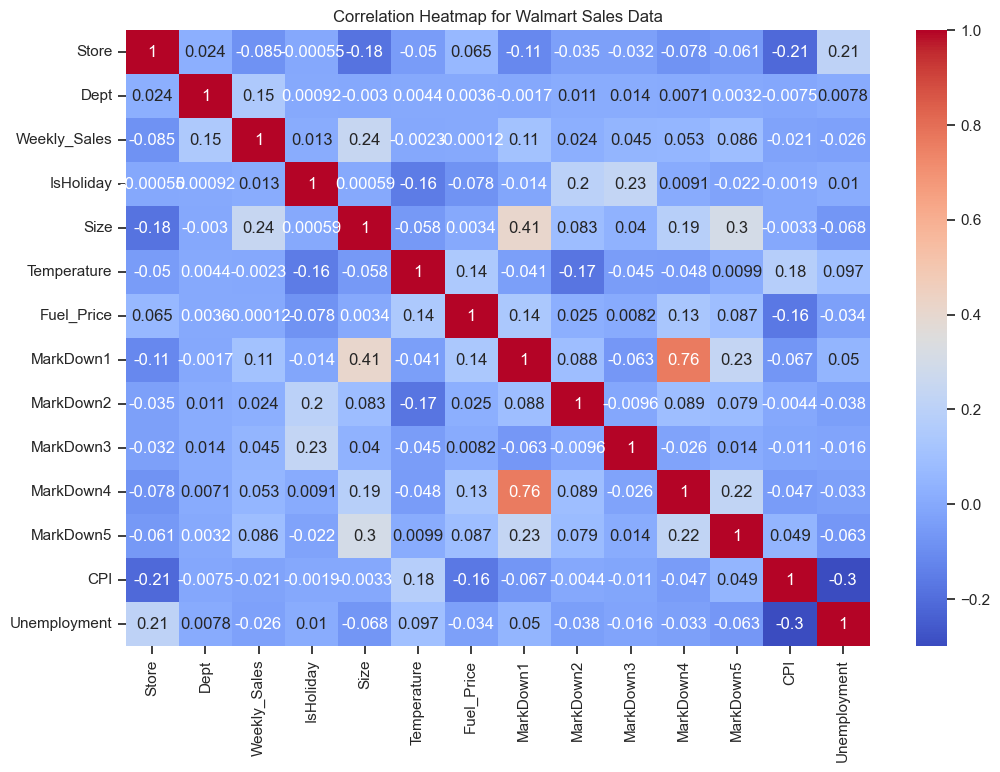

In [46]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Walmart Sales Data")
plt.show()

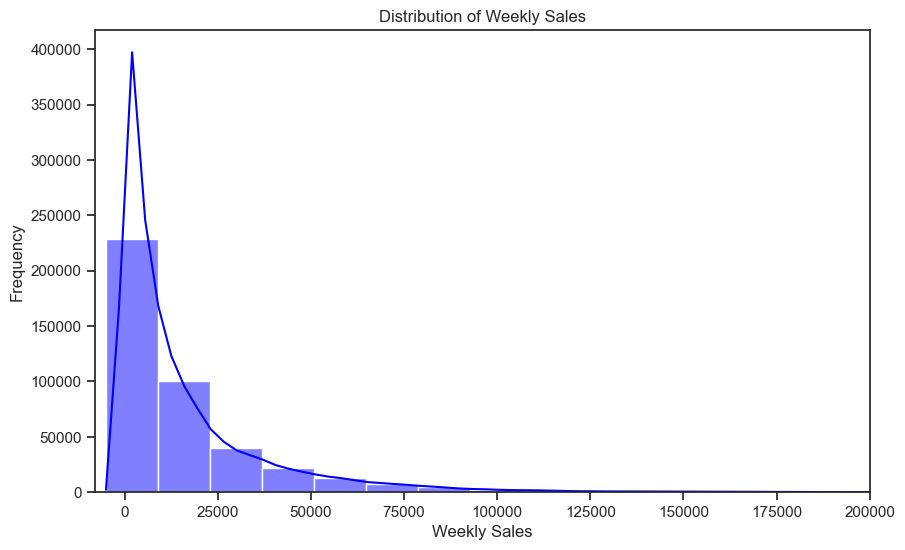

In [47]:
# Step 5: Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Weekly_Sales'], bins=50, kde=True, color='blue')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.xlim(-8000, 200000) 
plt.show()

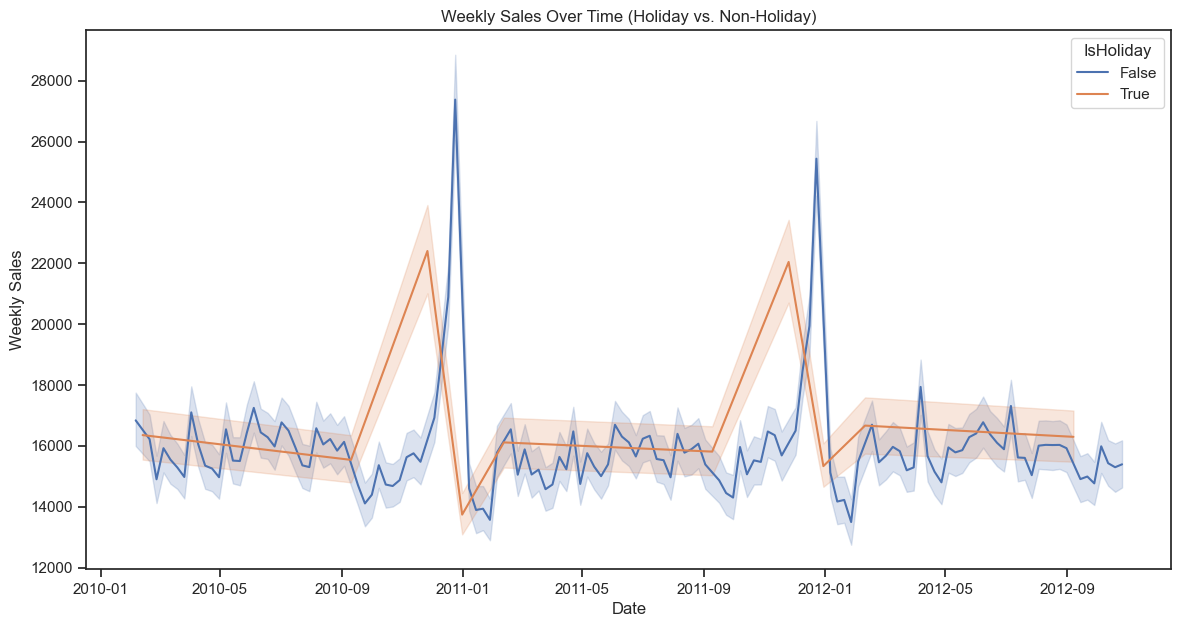

In [48]:
# Step 6: Sales Over Time
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
plt.figure(figsize=(14, 7))
sns.lineplot(data=dataset, x='Date', y='Weekly_Sales', hue='IsHoliday')
plt.title("Weekly Sales Over Time (Holiday vs. Non-Holiday)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title='IsHoliday')
plt.show()

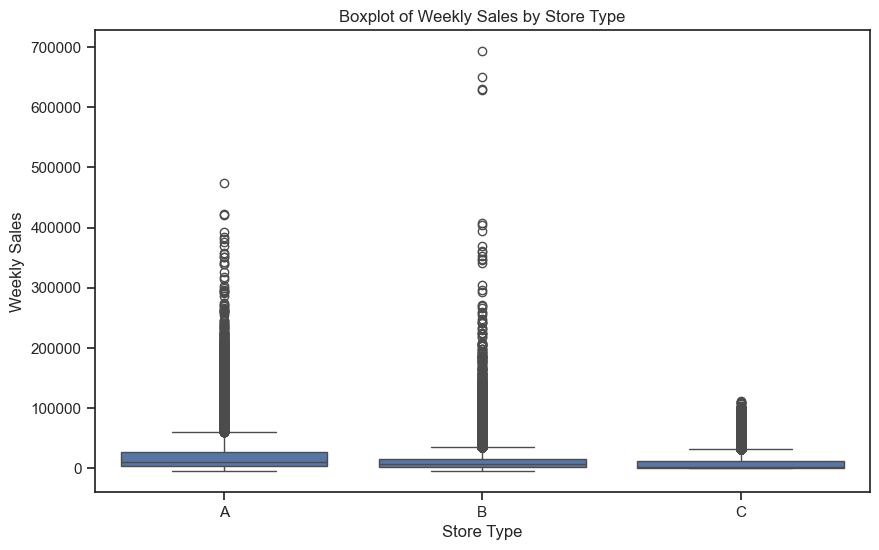

In [49]:
# Step 7: Sales by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=dataset)
plt.title("Boxplot of Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.show()

Outliers were not removed, since removing them would remove a large part of the dataset; also outliers were deemed not to be a data collection mistake rather the impact of markdowns(offers) and holiday impacts on Sales.

/var/folders/w4/f376hn2540v32r_5rgtcw5zw0000gn/T/ipykernel_1050/2635568967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales, palette='viridis')


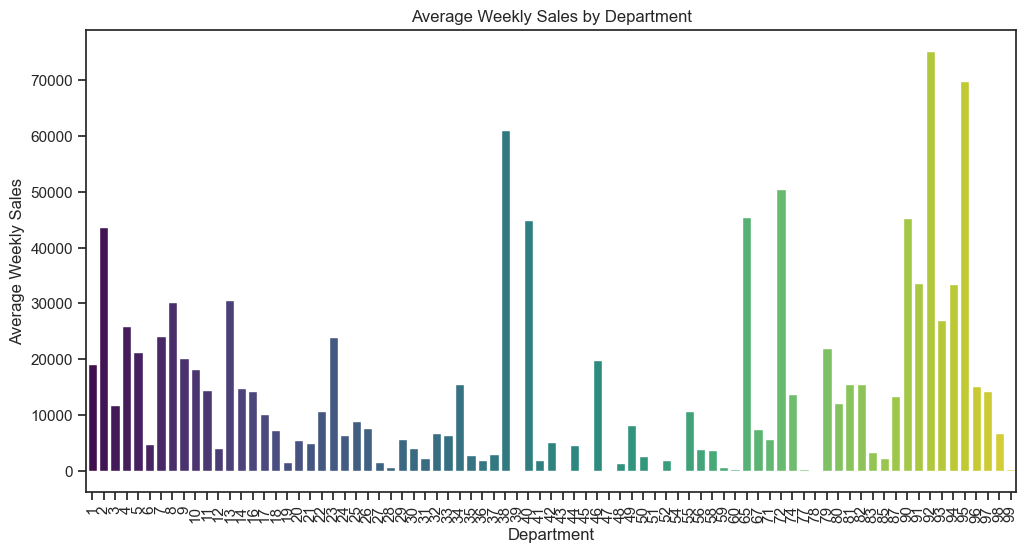

In [50]:
# Step 8: Average Sales by Department
dept_sales = dataset.groupby('Dept')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales, palette='viridis')
plt.title("Average Weekly Sales by Department")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.show()

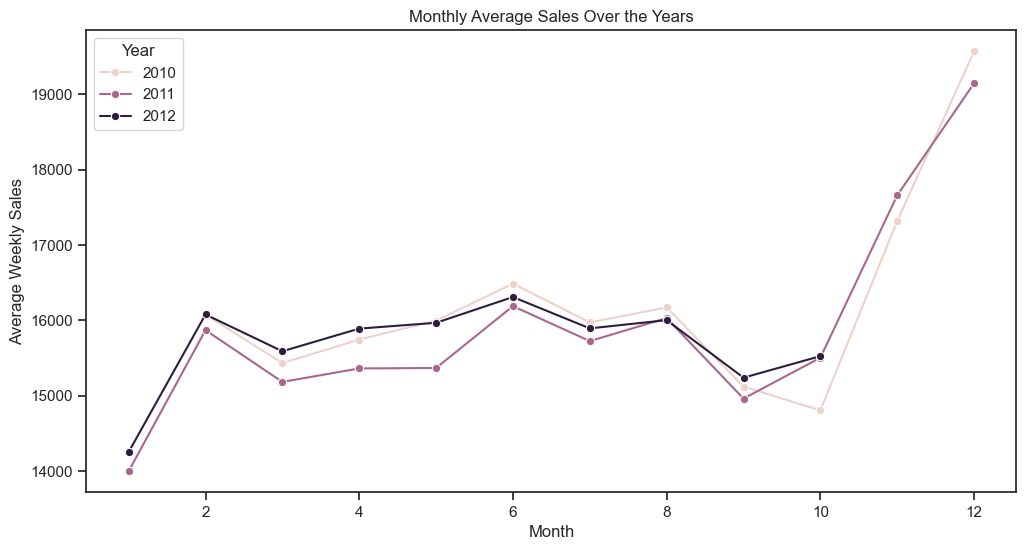

In [51]:
# Step 9: Grouped Sales by Year and Month
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
plt.figure(figsize=(12, 6))
monthly_sales = dataset.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title("Monthly Average Sales Over the Years")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.show()

In [52]:
# Step 10: Data Manipulation
dataset[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = dataset[
    ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

dataset['Week'] = pd.to_datetime(dataset['Date']).dt.isocalendar().week

In [53]:
# Step 11: Move Target Variable
df = dataset.pop('Weekly_Sales')
dataset['Weekly_Sales'] = df


In [54]:
# Step 12: Identify Inputs and Target
input_cols, target_col = dataset.columns[:-1], dataset.columns[-1]
inputs_df, targets = dataset[input_cols].copy(), dataset[target_col].copy()

In [55]:
# Step 13: Identify Numeric and Categorical Columns
numeric_cols = inputs_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()

In [56]:
# Step 14: Impute and Scale Numeric Columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [57]:
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [58]:

# Step 15: One-Hot Encoding for Categorical Columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Drop original categorical columns
inputs_df.drop(columns=categorical_cols, inplace=True)

In [59]:
# Step 16: Split Data into Training and Validation Sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.25, random_state=42)

In [60]:
train_inputs.to_csv('../cache/train_inputs.csv', index=False)
val_inputs.to_csv('../cache/val_inputs.csv', index=False)
train_targets.to_csv('../cache/train_targets.csv', index=False)
val_targets.to_csv('../cache/val_targets.csv', index=False)

In [ ]:
# Create the cache folder if it doesn't exist
if not os.path.exists('../cache'):
    os.makedirs('../cache')

# Check if the cache directory is empty
if os.listdir('../cache'):
    # Clean the cache directory
    shutil.rmtree('../cache')
    os.makedirs('../cache')

In [33]:
print("Training inputs shape:", train_inputs.shape)
print("Validation inputs shape:", val_inputs.shape)
print("Training targets shape:", train_targets.shape)
print("Validation targets shape:", val_targets.shape)

Training inputs shape: (316177, 20)
Validation inputs shape: (105393, 20)
Training targets shape: (316177,)
Validation targets shape: (105393,)


**This marks the end of our EDA process**

Here is the code to remove the Outliers which resulted in massive DataLoss and hence the idea was discarded to remove them. Additionally these outliers were deemed to hold meaningful information rathe than being erroenous

In [ ]:

# numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# outliers_dict = {}

# for col in numerical_columns:
#     Q1 = dataset[col].quantile(0.25)
#     Q3 = dataset[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define outlier boundaries
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Find outliers in the column
#     outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
#     if not outliers.empty:
#         outliers_dict[col] = outliers[col]
        

# for col, outliers in outliers_dict.items():
#     print(f"Outliers in {col}:")
#     print(outliers)
#     print("\n")


Outliers in Weekly_Sales:
8         57258.43
46        55931.23
63        50510.31
106       54060.10
113       57592.12
            ...   
421285    49380.11
421286    50241.01
421287    49334.77
421288    48434.97
421289    56017.47
Name: Weekly_Sales, Length: 35521, dtype: float64


Outliers in Temperature:
59052   -2.06
59195   -2.06
59338   -2.06
59481   -2.06
59624   -2.06
         ... 
68120   -2.06
68243   -2.06
68386   -2.06
68529   -2.06
68670   -2.06
Name: Temperature, Length: 69, dtype: float64


Outliers in MarkDown1:
104       34577.06
117       21290.13
130       27584.78
134       21442.73
247       34577.06
            ...   
421519    23052.25
421531    35348.47
421535    22832.38
421557    24853.05
421561    23641.30
Name: MarkDown1, Length: 9712, dtype: float64


Outliers in MarkDown2:
92         6115.67
99        46011.38
100       21813.16
101        8025.87
105        6927.23
            ...   
421528    11219.72
421532     6113.95
421533     7421.99
421534     5

In [ ]:
# # Removing outliers based on IQR for a specific column
# Q1 = dataset['Weekly_Sales'].quantile(0.25)
# Q3 = dataset['Weekly_Sales'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# dataset = dataset[(dataset['Weekly_Sales'] >= lower_bound) & (dataset['Weekly_Sales'] <= upper_bound)]



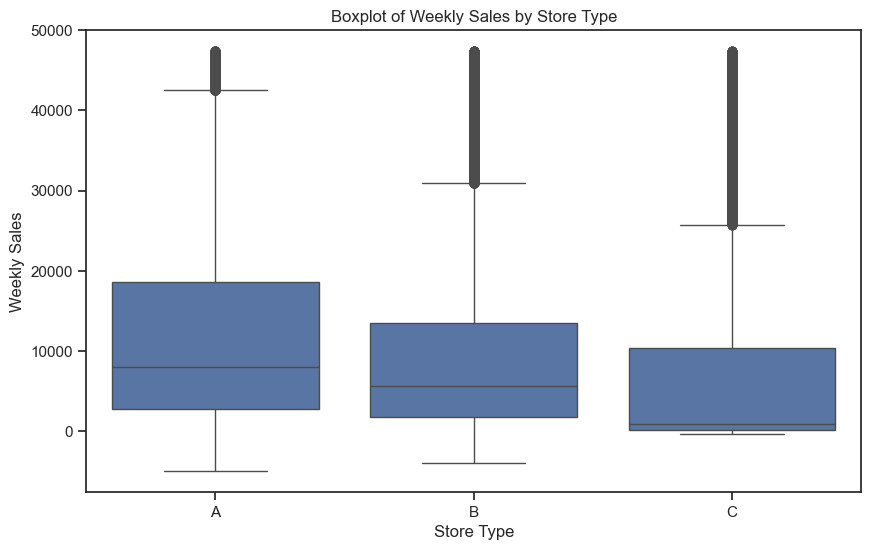

In [ ]:
# #now after removing outliar again plotingthe box plot graph just tu be sure outliar got removed
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Type', y='Weekly_Sales', data=dataset)
# plt.title("Boxplot of Weekly Sales by Store Type")
# plt.xlabel("Store Type")
# plt.ylabel("Weekly Sales")
# plt.show()